# SLT-CE-2: Deterministic Annealing

### References

<ol>
<li> Sections II.A.1 (principled derivation of deterministic annealing) and II.A.3 (Mass-constrained clustering) of 'Deterministic annealing for clustering, compression, classification, regression, and related optimization problems', Kenneth Rose, 1998, http://ieeexplore.ieee.org/document/726788/ 
</li>

<li>
The wine data set, http://www3.dsi.uminho.pt/pcortez/wine5.pdf
</li>
    
</ol>

### Setup 

In [2]:
import sklearn as skl
from sklearn.utils.validation import check_is_fitted
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import sklearn.svm as svm
from sklearn import cluster

import pandas as pd
import numpy as np
from treelib import Tree

import matplotlib.pyplot as plt
from matplotlib import cm

<h2 style="background-color:#f0b375;">
Section 4.0
<span style=font-size:50%> Complete all problems in this and previous sections to get a grade of 4.0 </span>
</h2>

<p style="background-color:#adebad;">
    For this exercise, it is of utmost importance to read reference [1] about deterministic annealing clustering (DAC). Our implementation will be based on this reference. Please shortly summarize what they refer to as the <i>preferred implementation</i> of the DAC algorithm.
</p>

The following steps summarize the preferred implementation of the DAC algorithm. This approach compromiese the mass-constrained approach which requires only as many codevectors as clusters at a given temperature and thus is computationally efficient and increases model size only by reaching a new critical temperature:

1. Set Limits: number of codevectors $K_{max}$, min temperature $T_{min}$
2. Initialize: $T > 2\lambda_{max}(C_x)$, $K = 1$, $y_1 = \sum_{x} xp(x)$, $p(y_1) = 1$
3. Update for $i = 1, ... ,K$:
    - $y_i = \frac{\sum_{x}xp(x)p(y_i|x)}{p(y_i)}$
    - where:
        - $p(y_i|x) = \frac{p(y_i)\exp((x-y_i)^2 / T)}{\sum_{j=1}^{K}p(y_j)\exp((x-y_j)^2 / T)}$
        - $p(y_i) = \sum_{x} xp(y_i|x)$
4. Convergence test: If not satisfied got to 3)
5. If $T \le T_{min}$ perform last iteration for $T = 0$ and STOP
6. Cooling step: $T \leftarrow \alpha T, (\alpha < 1)$
7. If $K < K_{max}$ check condition for phase transition for $i = 1,...,K$. If critical $T$ is reached for cluster $j$ add new codevector $y_{K+1} = y_{j} + \gamma, p(y_{K+1}) = p(y_j)/2,\:p(y_j) \leftarrow p(y_j)/2$ and increment $K$
8. Go to 3)
    
    



<p style="background-color:#adebad;">
    In order to avoid headaches with numerical instabilities, we first try our algorithm on a simple artificially generated data as below. Run the bloc below to have a look at the data. Later when we have everything implemented, we will examine some real world data. 
</p>

Text(0.5, 1.0, 'Test data')

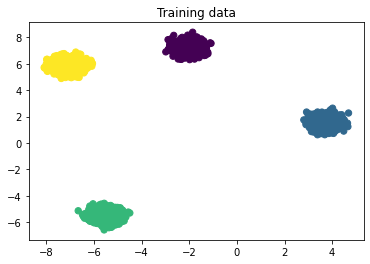

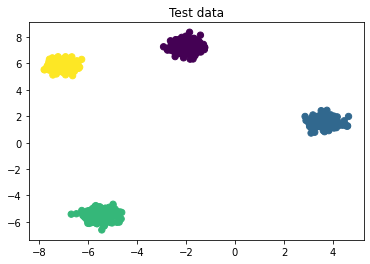

In [3]:
n_clusters = 4
ran_s = 42

# Generate artificial dataset
X, y_true = make_blobs(n_samples=7000, centers=4,
                       cluster_std=0.3, random_state=ran_s,
                       center_box=(-8.0, 8.0),
                       shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_true, train_size=6000, random_state=42)

plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=40, cmap='viridis')
plt.title("Training data")

plt.figure()
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=40, cmap='viridis')
plt.title("Test data")

<p style="background-color:#adebad;">
    Implement the <b>fit method</b> for the template class DeterministicAnnealing, according to the contract outlined in its docstring. (The template class DeterministicAnnealing is in file <b>DA.py</b> which you can open in your favourite IDE) For the implementation, it may help to take a look at both <b>get_distance method</b> and <b>fit _calculate_cluster_probs method</b> and implement them as well. Of course you are free to change all these methods or/and write additional methods for your purpose.
    You can add more class methods as necessary.
    See http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html for complementary information.
</p>
<p style="background-color:#adebad;">
    While implementing, you can run the bloc below to test your implementation.
</p>

0
├── 0
└── 1
    ├── 1
    │   ├── 1
    │   └── 3
    └── 2



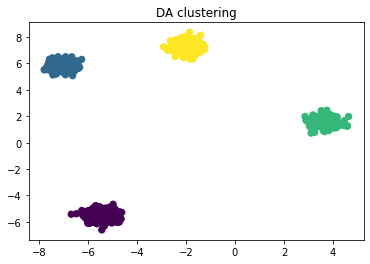

CPU times: user 9.16 s, sys: 109 ms, total: 9.27 s
Wall time: 9.08 s


In [9]:
%%time
from DA import DeterministicAnnealingClustering

DAC = DeterministicAnnealingClustering(
    n_clusters=n_clusters, random_state=ran_s, T = 150, T_min = 2, alpha = 0.95, beta = 1e-4)
DAC.fit(X_train)
y_DAC = DAC.predict(X_test)
y_DAC_hard = np.argmax(y_DAC, axis=1)
plt.figure()
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_DAC_hard, s=40, cmap='viridis')
plt.title("DA clustering")
plt.show()

<h2 style="background-color:#f0b375;">
Section 4.5
<span style=font-size:50%> Complete all problems in this section to get an additional (+0.5) point to the previous points. Note that you can have a maximum of 6 points at the end.</span>
</h2>

<p style="background-color:#adebad;">
    In this section we implement a plot which will help us better understand the DA method, and could also be a help for better debugging of your implementation.
    
 <ul style="background-color:#adebad;">
        <li> 
            Modify your implementation of <b>fit</b> function such that <b>plot_phase_diagram</b> method will produce a plot similar to the phase diagram plot shown in Figure 2 of the reference paper.
        </li>
</ul>  
</p>

<ul style="background-color:#adebad;">
            For this, extend DAC.fit to save the expected distortion during annealing as an additional attribute self.distortion.
            You might also want to save the number of effective clusters and the temperature along the way.
    </ul>
</p>

#### extend DAC.fit(self, X):
    # ...
    # Save information for each (n-th) annealing step:
    # self.distortion = [d0, d1, d2, ...]
    # self.n_eff_clusters = [e0, e1, e2, ...]
    # self.temp = [t0, t1, t2, ...]
    # ...

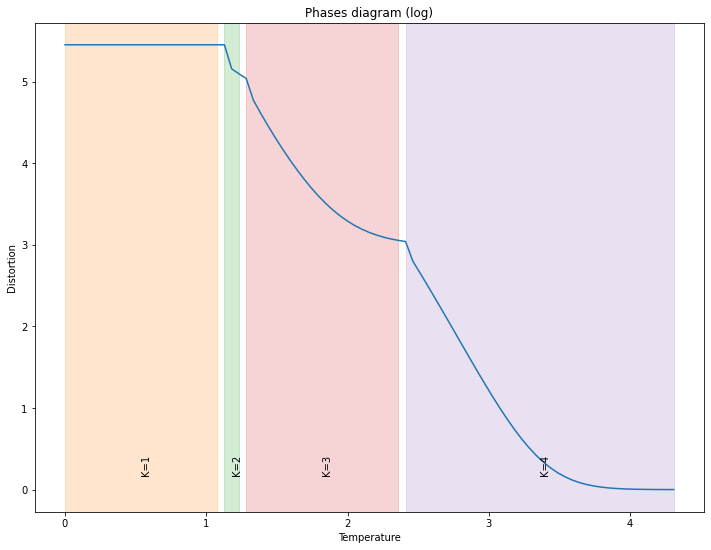

In [10]:
DAC.plot_phase_diagram()

<h2 style="background-color:#f0b375;">
Section 5.0
<span style=font-size:50%> Complete all problems in this section to get an additional (+0.5) point to the previous points.</span>
</h2>
<ul style="background-color:#adebad;">
Here we implement another plot which helps better undetrstad the dynamics of the algorithm.
        <li>
        Implement DAC.plot_bifurcation, which should create a bifurcation plot.<br>
        Modify DAC.fit to keep track of the distances, using the tree object DAC.bifurcation_tree. When a cluster splits, it creates two child nodes. Each node should store its centroid vector, and the distance to the parent centroid vector. After splitting, the parent node is not updated anymore.<br>
        In the bifurcation plot, the horizontal distance of a child node to its parent node should be exactly the distance to the parent centroid vector. The two child nodes should move in opposite directions, i.e. one to the left of the parent and one to the right.
        </li>
</ul>

This section could bit a bit annoying, you can also jump to the next sections and come back here later. 

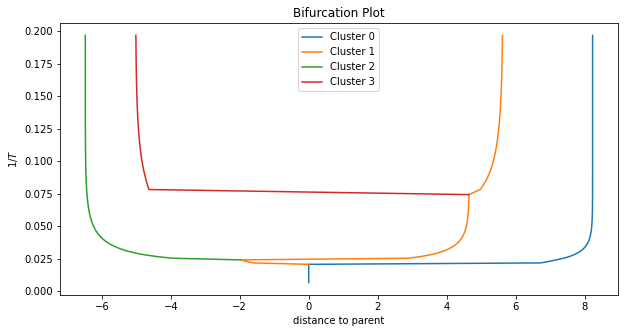

In [11]:
DAC.plot_bifurcation()

<h2 style="background-color:#f0b375;">
Section 5.5
<span style=font-size:50%> Complete all problems in this section to get an additional (+0.5) point to the previous points.</span>
</h2>

<p style="background-color:#adebad;">
Now we are ready to use some real world data. This might need some tweaking and handling of numberical instabilities. Please make sure your understand the data.
</p>

<p style="background-color:#adebad;">
Read the wine data [3], which contains 11 physiochemical attributes, and two labels (quality and color).
</p>

<p style="background-color:#adebad;">
    Create an instance of your DAC class with n_clusters = 2 and <b>fit the first 6000 samples</b> of the wine data set. Record the execution time. Furthermore, create an instance of the sklearn k-means class, and fit it with the same parameters. Again record the execution time. Make sure that the hyper parameters (initial temperature, min temperature, convergence criteria, noise, etc.) make sense and lead to a reasonable clustering
</p>

Our final hyperparameters are judged based on the following reasoning:
- $T_{init} = 8000$: set higher than the first critical temperature
- $T_{min} = 200$: lower values cannot be sustained as the normalizing constant would get too small
- $\alpha = 0.9, \beta = 0.001$ (controls convergence distance): the chosen values lead to a reasonable clustering (shown in graphs and section 6.0) and at the same time keep the execution time low. The incremental improvement by a further increase in $\alpha$ or decrease in $\beta$ for the clustering is considerably low while the execution time increases significantly.

In [12]:
from DA import read_data_csv
X, y = read_data_csv("wine-data.csv", y_names=["quality", "color"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y["color"], train_size=6000, random_state=42)

In [62]:
%%time
DAC = DeterministicAnnealingClustering(n_clusters=2, random_state=42, T = 8000, T_min = 200, alpha = 0.9, beta = 1e-3)
DAC.fit(X_train)

0
├── 0
└── 1

CPU times: user 2.97 s, sys: 16.1 ms, total: 2.98 s
Wall time: 2.98 s


DeterministicAnnealingClustering(T=180.22719635951356, T_min=200, alpha=0.9,
                                 beta=0.001, n_clusters=2)

In [66]:
%%time
kmeans = cluster.KMeans(n_clusters=2,random_state=42)
kmeans.fit(X_train)

CPU times: user 322 ms, sys: 336 ms, total: 657 ms
Wall time: 129 ms


KMeans(n_clusters=2, random_state=42)

In [67]:
%%time
y_kmeans = kmeans.predict(X_test)

CPU times: user 2.32 ms, sys: 5.56 ms, total: 7.89 ms
Wall time: 13.3 ms


In [68]:
%%time
y_DAC = DAC.predict(X_test)

CPU times: user 1.9 ms, sys: 1.74 ms, total: 3.64 ms
Wall time: 2.28 ms


In [69]:
X_train_DAC = DAC.transform(X_train)
X_test_DAC = DAC.transform(X_test)

X_train_kmeans = kmeans.transform(X_train)
X_test_kmeans = kmeans.transform(X_test)

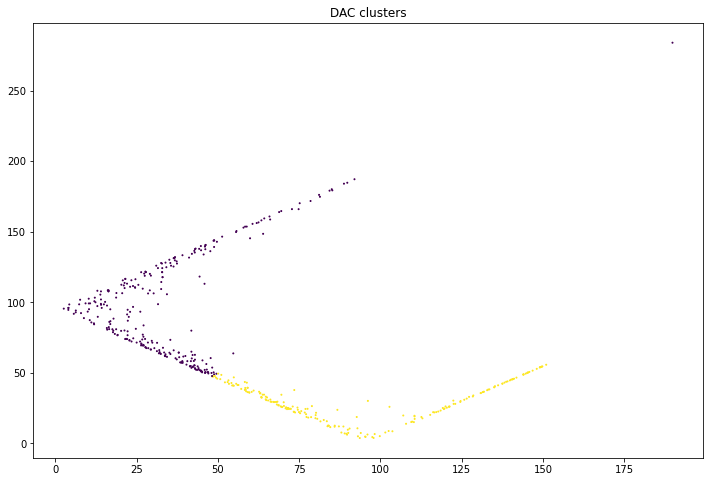

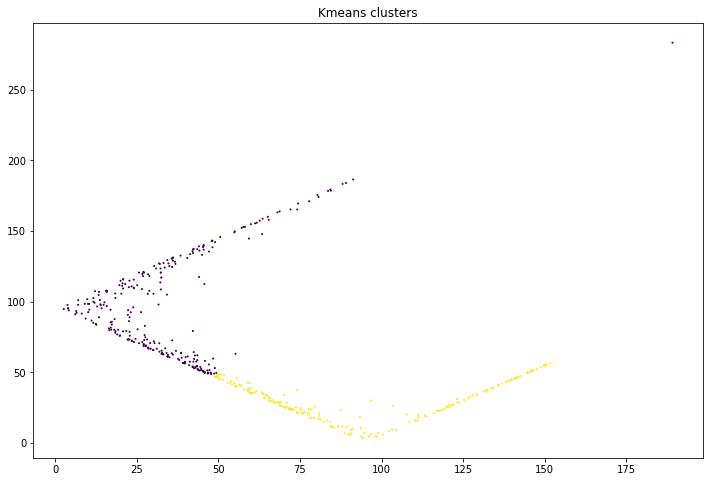

In [70]:
y_DAC_hard = np.argmax(y_DAC, axis=1)
# Plot for kmeans
plt.rcParams['axes.facecolor'] = 'white'
plt.figure(figsize =(12,8))
plt.scatter(X_test_DAC[:, 0], X_test_DAC[:, 1], c=y_DAC_hard, s=1)
plt.title('DAC clusters')
plt.show()

# Plot for kmeans
plt.rcParams['axes.facecolor'] = 'white'
plt.figure(figsize =(12,8))
plt.scatter(X_test_kmeans[:, 0], X_test_kmeans[:, 1], c=y_kmeans, s=1)
plt.title('Kmeans clusters')
plt.show()

<h2 style="background-color:#f0b375;">
Section 6.0
<span style=font-size:50%> Complete all problems in this section to get an additional (+0.5) point to the previous points.</span>
</h2>
<ul style="background-color:#adebad;">
<li> Before we can compute the confusion matrix, we need to perform some post-processing on the DAC cluster assignments.
    Explain what the function postprocess (defined below) does, and why we need it. To do so, complete the docstring of the function postprocess.
        </li>
</ul>

In [88]:
def postprocess(y_DAC, y_kmeans):
    """Maps the Predict assignment probabilites for DA to K-means cluster labesls

    Args:
        y_DAC (np.ndarray): predicted DA cluster assignment probabilities
        y_kmeans (np.ndarray): predicted K-means cluster assignments

    Returns:
         y_DAC_new (np.ndarray): predicted DA cluster assignments mapped to k-means cluster labels
    """
    
    y_DAC_hard = np.argmax(y_DAC, axis=1)
    
    n_clusters = len(np.unique(y_DAC_hard))
    dac2kmeans = []
    for cluster in range(n_clusters):
        argmax = np.argmax(y_DAC[:, cluster])
        print(argmax)
        dac2kmeans.append(y_kmeans[argmax])
        print(dac2kmeans)
        
    y_DAC_new = []
    for dac_label in y_DAC_hard:
        y_DAC_new.append(dac2kmeans[dac_label])
        
    return np.array(y_DAC_new)

In [72]:
skl.metrics.confusion_matrix(y_kmeans, postprocess(y_DAC, y_kmeans))

array([[288,   0],
       [  3, 206]])

</h2>

<ul style="background-color:#adebad;">
        <li> Read the docstring of <b>transform method</b> and understand what it does.
        </li>
        <li>
        Use DAC.transform and kmeans.transform to transform both, X_train and X_test. 
        </li>
       
</ul>

In [52]:
X_train_DAC = DAC.transform(X_train)
X_test_DAC = DAC.transform(X_test)

X_train_kmeans = kmeans.transform(X_train)
X_test_kmeans = kmeans.transform(X_test)

<ul style="background-color:#adebad;">
        <li>
        Fit an SVM classifier with default parameters to the untransformed data, and to the transformed data.
        Compare the performance of predicting whether the color of a wine is red or white.
        </li>
    </ul>

In [ ]:
svm_clas = svm.SVC(random_state=42)
svm_clas.fit(X_train, y_train)
svm_clas.score(X_test, y_test)

In [ ]:
svm_DAC = svm.SVC(random_state=42)
svm_DAC.fit(X_train_DAC, y_train)
svm_DAC.score(X_test_DAC, y_test)

In [ ]:
svm_kmeans = svm.SVC(random_state=42)
svm_kmeans.fit(X_train_kmeans, y_train)
svm_kmeans.score(X_test_kmeans, y_test)

<ul style="background-color:#adebad;">
        <li>
        Produce two scatter plots, one for X_train_DAC and one for X_train_kmeans.<br>
        Make the marker color indicate the wine color.
        </li>
    </ul>

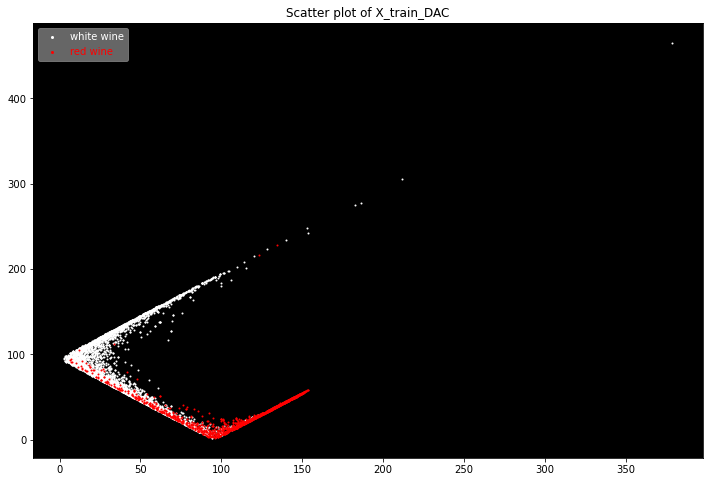

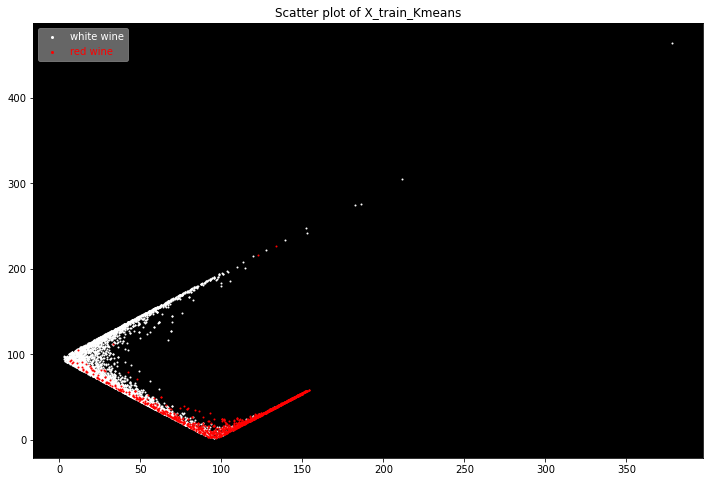

In [56]:
y_train_flat = y_train.flatten() 

# Plot for DAC
plt.rcParams['axes.facecolor'] = 'black'
plt.figure(figsize =(12,8))
plt.scatter(X_train_DAC[y_train_flat == 'white'][:, 0], X_train_DAC[y_train_flat == 'white'][:, 1], c='white', s=1)
plt.scatter(X_train_DAC[y_train_flat == 'red'][:, 0], X_train_DAC[y_train_flat == 'red'][:, 1], c='red', s=1)
plt.title('Scatter plot of X_train_DAC')
plt.legend(['white wine', 'red wine'], facecolor='grey', edgecolor = 'grey', 
           labelcolor = ['white', 'red'], markerscale = 2)
plt.show()

# Plot for kmeans
plt.rcParams['axes.facecolor'] = 'black'
plt.figure(figsize =(12,8))
plt.scatter(X_train_kmeans[y_train_flat == 'white'][:, 0], X_train_kmeans[y_train_flat == 'white'][:, 1], c='white', s=1)
plt.scatter(X_train_kmeans[y_train_flat == 'red'][:, 0], X_train_kmeans[y_train_flat == 'red'][:, 1],c='red', s=1)
plt.title('Scatter plot of X_train_Kmeans')
plt.legend(['white wine', 'red wine'], facecolor='grey', edgecolor = 'grey', 
           labelcolor = ['white', 'red'], markerscale = 2)
plt.show()

<ul style="background-color:#adebad;">
    <li>
        Create a fixed 2D embedding (e.g. with LLE, t-SNE, MDS) of the wine data and color the markers according to quality and color. Fit and transform X_train with DAC(n_clusters=2,3,4,5,6,7,8,...). Produce a plot of the SVM score svm_DAC.score(X_test_DAC, y_test) as a function of n_clusters.. Each time use marker shapes to display the cluster memberships, and compare to the labels color and quality.
    </li>
</ul>

In [57]:
X_train_qty, X_test_qty, y_train_qty, y_test_qty = train_test_split(X, y["quality"], train_size=6000, random_state=42)

y_test_qty_flat = y_test_qty.flatten()

In [ ]:
%%time
y_test_flat = y_test.flatten()
tsne = skl.manifold.TSNE(n_components= 2, random_state=ran_s)
X_tsne = tsne.fit_transform(X_test)

clusters = [*range(2,9)]
markers = ["o", "v", "*", "P", "X", "d", "+", "D"]
scores_col = []
scores_qty = []

for n_clust in clusters:
    
    DAC = DeterministicAnnealingClustering(n_clusters=n_clust, random_state=ran_s, T = 8000, T_min=200, alpha = 0.9, beta = 1e-3)
    
    # Cluster predictions
    DAC.fit(X_train)
    y_DAC = DAC.predict(X_test)
    y_DAC_hard = np.argmax(y_DAC, axis=1)
    
    # Calculate scores for SVM Color
    X_train_DAC = DAC.transform(X_train)
    X_test_DAC = DAC.transform(X_test)
    sv_DAC = svm.SVC(random_state=42)
    sv_DAC.fit(X_train_DAC, y_train)
    score_col = sv_DAC.score(X_test_DAC, y_test)
    scores_col.append(score_col)
    
    # Calculate scores for SVM Quality
    X_train_qty_DAC = DAC.transform(X_train_qty)
    X_test_qty_DAC = DAC.transform(X_test_qty)
    sv_DAC_qty = svm.SVC(random_state=42)
    sv_DAC_qty.fit(X_train_qty_DAC, y_train_qty)
    score_qty = sv_DAC_qty.score(X_test_qty_DAC, y_test_qty)
    scores_qty.append(score_qty)
    
    # 2d embedding plot for color
    plt.rcParams['axes.facecolor'] = 'black'
    plt.figure(figsize =(12,8))
    for clust in range(n_clust):
        plt.scatter(X_tsne[y_DAC_hard == clust][:,0], X_tsne[y_DAC_hard == clust][:,1], 
                    c=y_test_flat[y_DAC_hard == clust], marker = markers[clust], s=40)

    plt.title('Wine color: 2D Embedding with ' + str(n_clust) + ' clusters')
    plt.show()
    
    # 2d embedding plot for quality
    plt.rcParams['axes.facecolor'] = 'white'
    plt.figure(figsize =(14,8))
    for clust in range(n_clust):
        plt.scatter(X_tsne[y_DAC_hard == clust][:,0], X_tsne[y_DAC_hard == clust][:,1], 
                    c=y_test_qty_flat[y_DAC_hard == clust], marker = markers[clust], s=40, 
                    cmap = plt.cm.get_cmap('viridis', np.ptp(y_test_qty_flat)))

    plt.title('Wine quality: 2D Embedding with ' + str(n_clust) + ' clusters')
    plt.colorbar()
    plt.clim(min(y_test_qty_flat), max(y_test_qty_flat))
    plt.show()
        

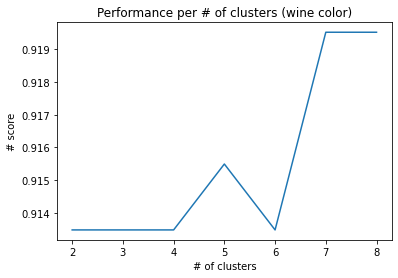

In [59]:
plt.rcParams['axes.facecolor'] = 'white'
plt.plot(clusters, scores_col)
plt.xlabel('# of clusters')
plt.ylabel('# score')
plt.title('Performance per # of clusters (wine color)')
plt.xticks(np.asarray(clusters))
plt.show()

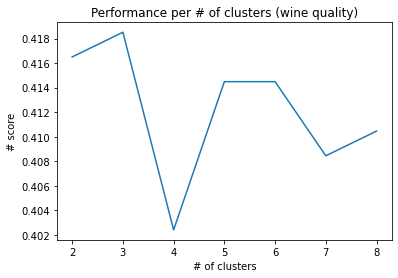

In [60]:
plt.plot(clusters, scores_qty)
plt.xlabel('# of clusters')
plt.ylabel('# score')
plt.title('Performance per # of clusters (wine quality)')
plt.xticks(np.asarray(clusters))
plt.show()

<ul style="background-color:#adebad;">
        <li>
            So far, our implementation of DAC assumed that our data is compatible with the euclidian metric. Argue why this assumption is not justified for the wine-data. Suggest a better alternative (no implementation required!).
        </li>
    </ul>
</p>



The Euclidean metric is insensitive to the scale of the features, which is a particular issue in the wine dataset as the scale of some features differs significantly. Consequently, changes of features on a larger scale receive the majority of the weight while even large distance changes of features on a very small scale are almost neglected. Suitable alternative which take into account the different scale of the features are for instance: the normalized Euclidean distance, the weighted Euclidean distance, or the Mahalanobis distance.